In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns; sns.set()
#sns.set_context('paper')
from matplotlib_visuals import *
import time
from IPython.display import clear_output

import asg
from utility import *

%matplotlib inline

IP = '192.168.0.117'
maxf = 7629

In [3]:
plt.rcParams['figure.figsize'] = [8, 6]

(0, 1400)

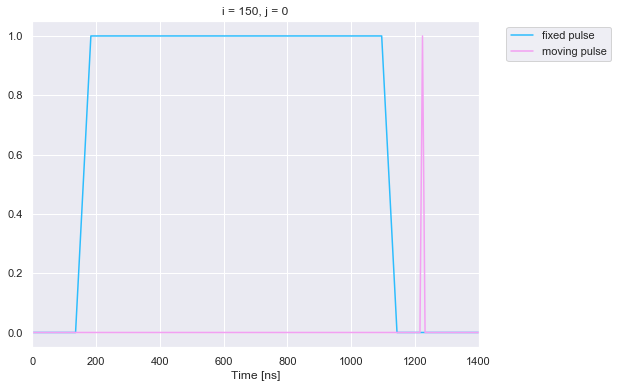

In [110]:
i = 150
j = 0

tr = 2e3
t2 = 1e3
#t1 = 0.083333333333e3 * i
small_delay = 8 * i        # ns
big_delay = 208 * j         # ns

num_p = 64
width = 8 # ns
slope = 0

t = np.linspace(0, 2**14, 2**14)*8
# 0 < t1 < 10*tr, let's say in 20 steps
# t1 = 0, 1e3=t2, 2e3=tr, 3e3, 4e3, ... , 20e3  [ns]

# 2**14 * 8 / 2e3 = 65.536
fixed_pulse = multi_pulse(tr, t2, nr_of_pulses=num_p)
shifted_fixed_pulse = shift_ns(fixed_pulse, 120)
#moving_pulse = shift_ns(fixed_pulse, t1)


moving_pulse = multi_pulse(tr, width, nr_of_pulses=num_p, s_length=slope)
moving_pulse = shift_ns(moving_pulse, small_delay + big_delay)

plt.plot(t, shifted_fixed_pulse, label='fixed pulse')
plt.plot(t, moving_pulse, label='moving pulse')
plt.title(f'i = {i}, j = {j}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Time [ns]')

plt.xlim(left=0, right=1400)

In [66]:
rp = asg.start(IP)

In [124]:
asg.setup_scope(rp=rp, gain1='lv', gain2='lv', trigger_delay=int(2**14/2), trigger_source='awg_pe')
    
ch1, ch2 = asg.acquire(rp=rp, channel='both')

In [111]:
tr = 2e3    # ns
num_p = 64
width = width 
slope = slope
step = 8
n = 150

M, P = np.zeros(n, dtype=np.ndarray),np.zeros(n, dtype=np.ndarray)
S = np.zeros(n)
for i in range(n):
    clear_output(wait=True)
    start = step * i
    
    moving_pulse = multi_pulse(tr, width, nr_of_pulses=num_p, s_length=slope)
    moving_pulse = shift_ns(moving_pulse, start)
    
    asg.reset(rp=rp)
    
    asg.setup(rp=rp, output=1, waveform='arbitrary', data=shifted_fixed_pulse, frequency=maxf, amplitude=1, burst_mode=True, bursts=1)
    asg.setup(rp=rp, output=2, waveform='arbitrary', data=moving_pulse, frequency=maxf, amplitude=1, burst_mode=True, bursts=1)
    
    asg.on(rp=rp, output=1)
    asg.on(rp=rp, output=2)
    
    asg.setup_scope(rp=rp, gain1='lv', gain2='lv', trigger_delay=int(2**14/2), trigger_source='awg_pe')
    
    pulse, mixers = asg.acquire(rp=rp, channel='both')
    
    M[i] = mixers
    P[i] = pulse
    S[i] = start
    print(f'Step: {i}')
    
asg.off(rp=rp)

Step: 149


(0.2, 1)

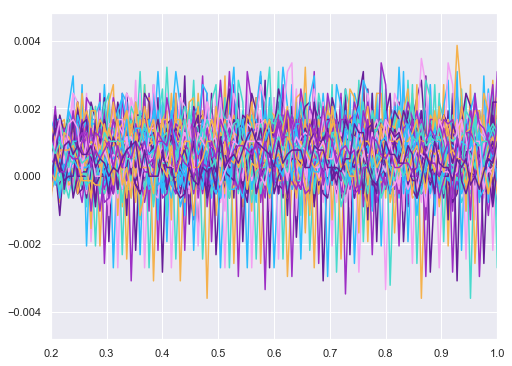

In [112]:
avg = np.zeros(n)
t = np.linspace(0, 2**14, 2**14)*8/1e3  
for i in range(n):
    #Nm = np.linalg.norm(M_m[i])
    #Np = np.linalg.norm(M_p[i])
    plt.plot(t, M[i], label=i)
    #plt.plot(t, P[i], label=i)
    avg[i] = np.average(M[i])
    
plt.xlim(left=0.2, right=1)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Text(0.5, 1.0, '1 $\\mu$s pulse (shift = 120 ns) swept with 8 ns pulse using RP; stepsize = 8 ns')

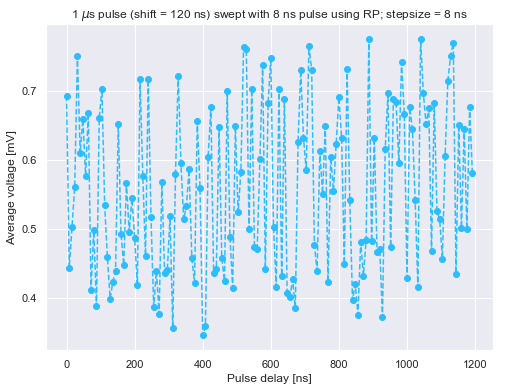

In [118]:
plt.plot(S, avg*1e3, marker='o', ls='--')
plt.xlabel('Pulse delay [ns]')
plt.ylabel('Average voltage [mV]')
plt.title('1 $\mu$s pulse (shift = 120 ns) swept with 8 ns pulse using RP; stepsize = 8 ns')
#plt.xlim(left=50, right=200)


(50, 200)

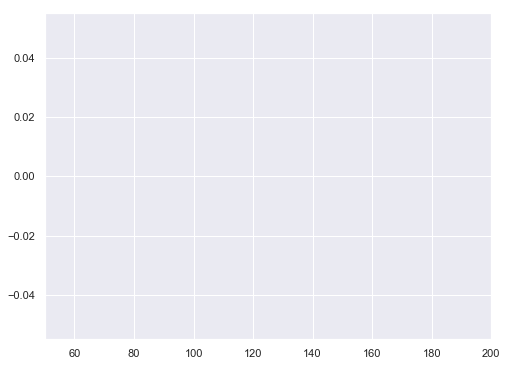

In [115]:
#V, D = np.zeros(n), np.zeros(n)
#for i in range(n):
    #np.save('RP_sweep_16ns_step_8ns' + str(i), M[i])
    #np.save('RP_delay_16ns_step_8ns' + str(i), S[i])
    #V[i] = np.average(np.load('RP_sweep_16ns_step_8ns' + str(i) + '.npy'))
    #D[i] = np.load('RP_delay_16ns_step_8ns' + str(i) + '.npy')

plt.plot(D, V, ls='--', marker='o')
plt.xlim(left=50, right=200)

In [25]:
asg.reset(rp=rp)
asg.setup(rp=rp, output=1, waveform='arbitrary', data=fixed_pulse, frequency=maxf, amplitude=1, burst_mode=True, bursts=1)
asg.setup(rp=rp, output=2, waveform='arbitrary', data=moving_pulse, frequency=maxf, amplitude=1, burst_mode=True, bursts=1)

In [26]:
asg.on(rp=rp, output=1)
asg.on(rp=rp, output=2)

In [27]:
asg.setup_scope(rp=rp, gain1='lv', gain2='lv', trigger_delay=int(2**14/2))

In [28]:
array1, array2 = asg.acquire(rp=rp, channel='both')

both


In [ ]:
asg.trigger(rp=rp, output='both')

In [163]:
asg.off(rp=rp)

Text(0.5, 0, 'Time [ns]')

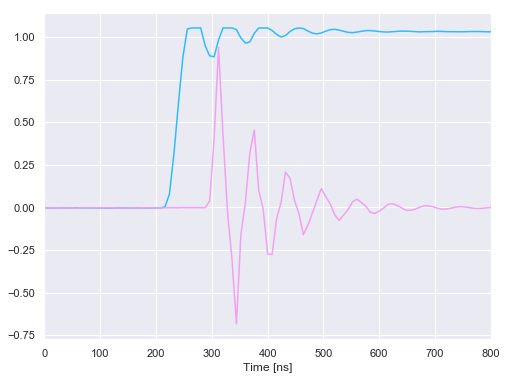

In [29]:
plt.plot(t, array1)
plt.plot(t, array2)
plt.xlim(left=0, right=800)
plt.xlabel('Time [ns]')